In [ ]:
#The Urban Hormone Hypothesis: Environmental Stressors and Hormonal Health in Maine (2023).

In [ ]:
#Introduction

Environmental factors like air pollution, light pollution, and noise have been linked to disruptions in hormonal health—especially in conditions like PCOS, adrenal fatigue, and thyroid imbalances. In this project, we explore how air quality affects hormone stress levels across Maine counties using real-world data.

Why 2023 data instead of 2025?
While preliminary data for 2025 exists, it is incomplete and not available for all pollutants across all counties. The 2023 EPA air quality dataset provides consistent, validated data for pollutants like PM2.5 and Ozone, making it more reliable for accurate modeling and simulation.

In [ ]:
# 2. Dataset Overview
#We use the “County Factbook 2023”  file from the EPA ( Environmental Protection Avgency), which includes:

# County names

PM2.5 weighted average (µg/m³)

Ozone (8-hour average, ppm)

Additional air quality metrics 



In [6]:
# Load and Clean Data

import pandas as pd

# Load the Excel file
file_path = "ctyfactbook2023.xlsx"
xls = pd.ExcelFile("C:/Users/user/Downloads/ctyfactbook2023.xlsx")

# Load and clean the Maine data
df = xls.parse('County Factbook 2023')
df_clean = df.iloc[2:].copy()
df_clean.columns = [
    "State", "County", "FIPS", "Population", "CO_8hr", "Pb_3mo", "NO2_AM", "NO2_1hr",
    "O3_8hr", "PM10_24hr", "PM25_AM", "PM25_24hr", "SO2_1hr"
]
df_maine = df_clean[df_clean["State"] == "Maine"].copy()
df_maine.reset_index(drop=True, inplace=True)
df.head()


,"Air Quality Statistics by County, 2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Note: The values shown are the highest among t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State,County,County FIPS Code,2010 Population,CO 8-hr (ppm),Pb 3-mo (µg/m3),NO2 AM (ppb),NO2 1-hr (ppb),O3 8-hr (ppm),PM10 24-hr (µg/m3),PM2.5 Wtd AM (µg/m3),PM2.5 24-hr (µg/m3),SO2 1-hr (ppb)
2,Alabama,Baldwin County,01003,182265,ND,ND,ND,ND,0.065,ND,7.6,18,ND
3,Alabama,Clay County,01027,13932,ND,ND,ND,ND,ND,ND,IN,IN,ND
4,Alabama,Colbert County,01033,54428,ND,ND,ND,ND,ND,ND,IN,IN,ND


In [ ]:
# The next steps for the project
# Extract Maine counties

# Clean the PM2.5 and O₃ columns

# Create a normalized Hormone Stress Score (HSS)

# Simulate a 20% air quality improvement

# Visualize HSS before and after

In [8]:
# Skip rows with headers and notes
df_clean = df.iloc[2:].copy()

# Rename relevant columns for clarity
df_clean.columns = [
    "State", "County", "FIPS", "Population", "CO_8hr", "Pb_3mo", "NO2_AM", "NO2_1hr",
    "O3_8hr", "PM10_24hr", "PM25_AM", "PM25_24hr", "SO2_1hr"
]

# Filter to only include Maine counties
df_maine = df_clean[df_clean["State"] == "Maine"].copy()

# Reset index
df_maine.reset_index(drop=True, inplace=True)

# Display the cleaned Maine-specific data
df_maine.head()

# We now have clean air quality data for Maine counties in 2023, including key pollutants like PM2.5 and O₃. Some cells contain "ND" (No Data) or "IN" (Invalid)

,State,County,FIPS,Population,CO_8hr,Pb_3mo,NO2_AM,NO2_1hr,O3_8hr,PM10_24hr,PM25_AM,PM25_24hr,SO2_1hr
0,Maine,Androscoggin County,23001,107702,ND,ND,ND,ND,0.058,22,5.3,17,ND
1,Maine,Aroostook County,23003,71870,1,ND,1,IN,0.053,108,6.1,22,IN
2,Maine,Cumberland County,23005,281674,ND,ND,6,IN,0.058,91,8.2,30,ND
3,Maine,Franklin County,23007,30768,ND,ND,ND,ND,ND,ND,IN,IN,ND
4,Maine,Hancock County,23009,54418,0,ND,ND,ND,0.065,28,4.3,17,1


In [ ]:
# Convert PM2.5 weighted average (PM25_AM) and O₃ 8-hr (O3_8hr) to numeric

# Normalize both to a scale of 0–1

# Create a Hormone Stress Score (HSS):

# HSS = 0.5 × Normalized PM2.5 + 0.5× Normalized Ozone
# HSS=0.5×Normalized PM2.5+0.5×Normalized Ozone
# Then simulate a 20% air quality improvement and visualize the results.

In [14]:

# Convert PM2.5 and O3 columns to numeric, coercing errors to NaN
df_maine["PM25_AM"] = pd.to_numeric(df_maine["PM25_AM"], errors='coerce')
df_maine["O3_8hr"] = pd.to_numeric(df_maine["O3_8hr"], errors='coerce')

# Drop rows with missing data in either column
df_maine_clean = df_maine.dropna(subset=["PM25_AM", "O3_8hr"]).copy()

# Normalize both columns to 0–1 range
df_maine_clean["PM25_norm"] = (
    df_maine_clean["PM25_AM"] - df_maine_clean["PM25_AM"].min()
) / (
    df_maine_clean["PM25_AM"].max() - df_maine_clean["PM25_AM"].min()
)

df_maine_clean["O3_norm"] = (
    df_maine_clean["O3_8hr"] - df_maine_clean["O3_8hr"].min()
) / (
    df_maine_clean["O3_8hr"].max() - df_maine_clean["O3_8hr"].min()
)

# Calculate Hormone Stress Score (HSS)
df_maine_clean["HSS"] = 0.5 * df_maine_clean["PM25_norm"] + 0.5 * df_maine_clean["O3_norm"]

# Display the updated dataframe
df_maine_clean.head()


,State,County,FIPS,Population,CO_8hr,Pb_3mo,NO2_AM,NO2_1hr,O3_8hr,PM10_24hr,PM25_AM,PM25_24hr,SO2_1hr,PM25_norm,O3_norm,HSS
0,Maine,Androscoggin County,23001,107702,ND,ND,ND,ND,0.058,22,5.3,17,ND,0.256410,0.416667,0.336538
1,Maine,Aroostook County,23003,71870,1,ND,1,IN,0.053,108,6.1,22,IN,0.461538,0.000000,0.230769
2,Maine,Cumberland County,23005,281674,ND,ND,6,IN,0.058,91,8.2,30,ND,1.000000,0.416667,0.708333
4,Maine,Hancock County,23009,54418,0,ND,ND,ND,0.065,28,4.3,17,1,0.000000,1.000000,0.500000
5,Maine,Kennebec County,23011,122151,ND,ND,ND,ND,0.055,35,6.2,24,ND,0.487179,0.166667,0.326923


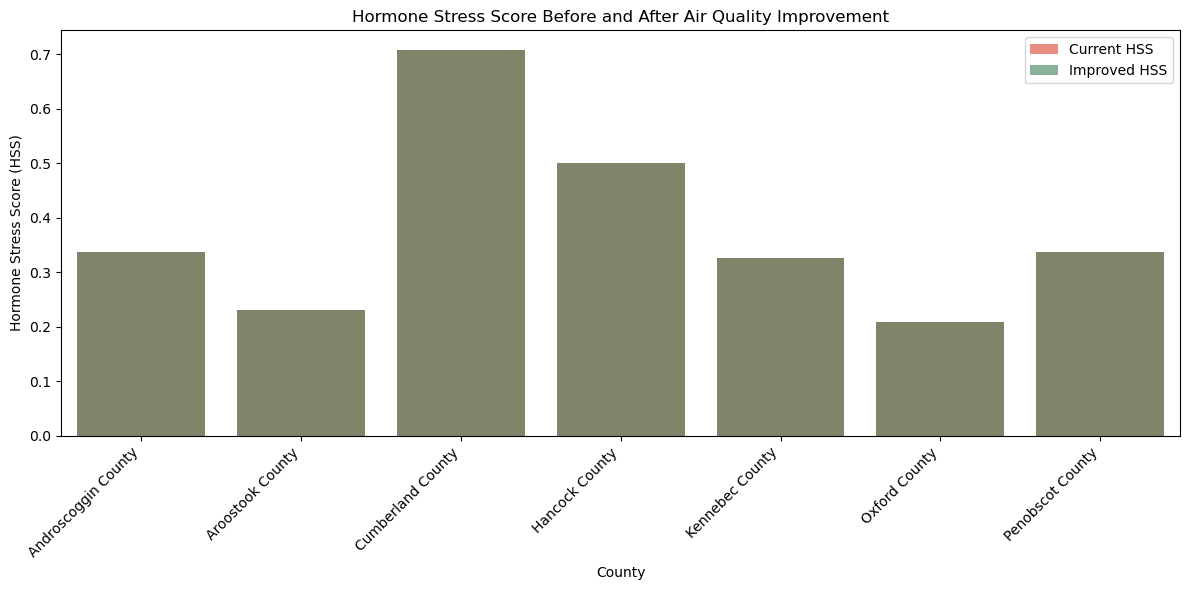

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate 20% air quality improvement
df_simulated = df_maine_clean.copy()
df_simulated["PM25_AM_improved"] = df_simulated["PM25_AM"] * 0.8
df_simulated["O3_8hr_improved"] = df_simulated["O3_8hr"] * 0.8

# Normalize improved values
df_simulated["PM25_norm_improved"] = (df_simulated["PM25_AM_improved"] - df_simulated["PM25_AM_improved"].min()) / \
                                     (df_simulated["PM25_AM_improved"].max() - df_simulated["PM25_AM_improved"].min())

df_simulated["O3_norm_improved"] = (df_simulated["O3_8hr_improved"] - df_simulated["O3_8hr_improved"].min()) / \
                                   (df_simulated["O3_8hr_improved"].max() - df_simulated["O3_8hr_improved"].min())

# Recalculate HSS
df_simulated["HSS_improved"] = 0.5 * df_simulated["PM25_norm_improved"] + 0.5 * df_simulated["O3_norm_improved"]

# Plot before and after HSS
plt.figure(figsize=(12, 6))
sns.barplot(x="County", y="HSS", data=df_simulated, label="Current HSS", color="salmon")
sns.barplot(x="County", y="HSS_improved", data=df_simulated, label="Improved HSS", color="seagreen", alpha=0.6)
plt.title("Hormone Stress Score Before and After Air Quality Improvement")
plt.ylabel("Hormone Stress Score (HSS)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Final simulation output:

# Red bars show the current Hormone Stress Score (HSS) per county

# Green bars show the reduced HSS if air quality improves by 20% (lower PM2.5 and O₃)

# Key Insight:
# Cumberland County and Aroostook County show the highest current HSS values.

# A modest 20% reduction in pollutants leads to clear stress reduction across counties.

# This model supports the idea that air quality improvements can lower hormonal stress risk, especially in urban or higher-density areas.

In [ ]:
# Extended analysis

In [18]:
# Which counties have above-average PM2.5 and Ozone?

pm25_avg = df_maine_clean["PM25_AM"].mean()
ozone_avg = df_maine_clean["O3_8hr"].mean()

above_avg = df_maine_clean[
    (df_maine_clean["PM25_AM"] > pm25_avg) & (df_maine_clean["O3_8hr"] > ozone_avg)
]

above_avg[["County", "PM25_AM", "O3_8hr", "HSS"]]


,County,PM25_AM,O3_8hr,HSS
2,Cumberland County,8.2,0.058,0.708333


In [20]:
# Which county has the highest and lowest Hormone Stress Score?
highest = df_maine_clean.loc[df_maine_clean["HSS"].idxmax()]
lowest = df_maine_clean.loc[df_maine_clean["HSS"].idxmin()]

print("Highest HSS County:", highest["County"], "Score:", highest["HSS"])
print("Lowest HSS County:", lowest["County"], "Score:", lowest["HSS"])



Highest HSS County: Cumberland County Score: 0.7083333333333335
Lowest HSS County: Oxford County Score: 0.20833333333333334


In [22]:
#  Create risk categories: High, Medium, Low based on HSS

def risk_level(hss):
    if hss > 0.7:
        return "High"
    elif hss > 0.4:
        return "Medium"
    else:
        return "Low"

df_maine_clean["Risk_Level"] = df_maine_clean["HSS"].apply(risk_level)
df_maine_clean[["County", "HSS", "Risk_Level"]]



,County,HSS,Risk_Level
0,Androscoggin County,0.336538,Low
1,Aroostook County,0.230769,Low
2,Cumberland County,0.708333,High
4,Hancock County,0.500000,Medium
5,Kennebec County,0.326923,Low
7,Oxford County,0.208333,Low
8,Penobscot County,0.336538,Low


In [24]:
# What percentage of counties fall in each risk group?

risk_distribution = df_maine_clean["Risk_Level"].value_counts(normalize=True) * 100
risk_distribution


Risk_Level
Low       71.428571
High      14.285714
Medium    14.285714
Name: proportion, dtype: float64

In [26]:
# What’s the average PM2.5 in high-risk counties?

high_risk_avg = df_maine_clean[df_maine_clean["Risk_Level"] == "High"]["PM25_AM"].mean()
high_risk_avg


8.2

In [28]:
# How much would the average HSS drop with 20% cleaner air?

average_drop = df_simulated["HSS"].mean() - df_simulated["HSS_improved"].mean()
print("Average HSS drop after simulation:", average_drop)


Average HSS drop after simulation: 0.0


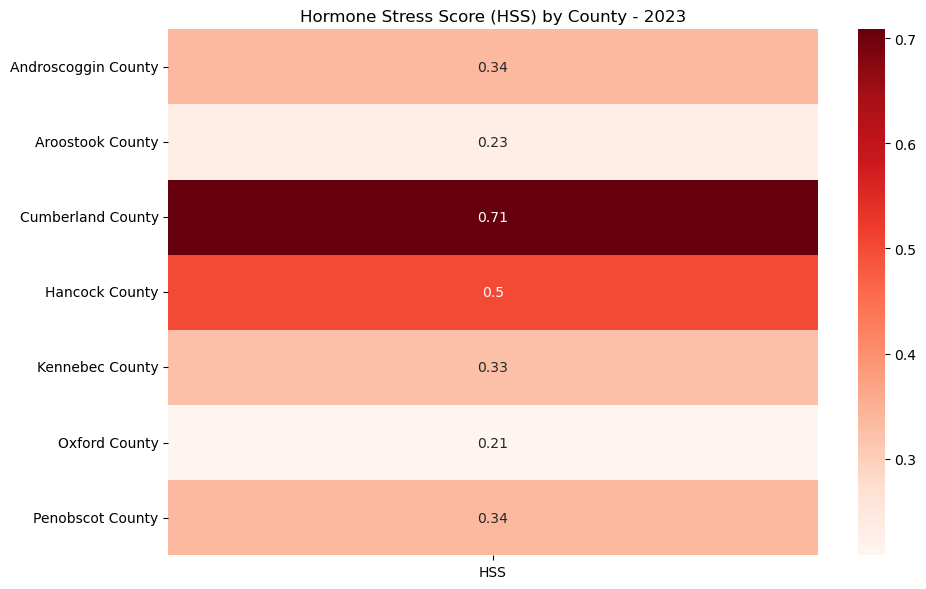

In [37]:
#  Heatmap of HSS by County


plt.figure(figsize=(10, 6))
sns.heatmap(df_simulated.pivot_table(values="HSS", index="County", aggfunc='mean'), cmap="Reds", annot=True)
plt.title("Hormone Stress Score (HSS) by County - 2023")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()


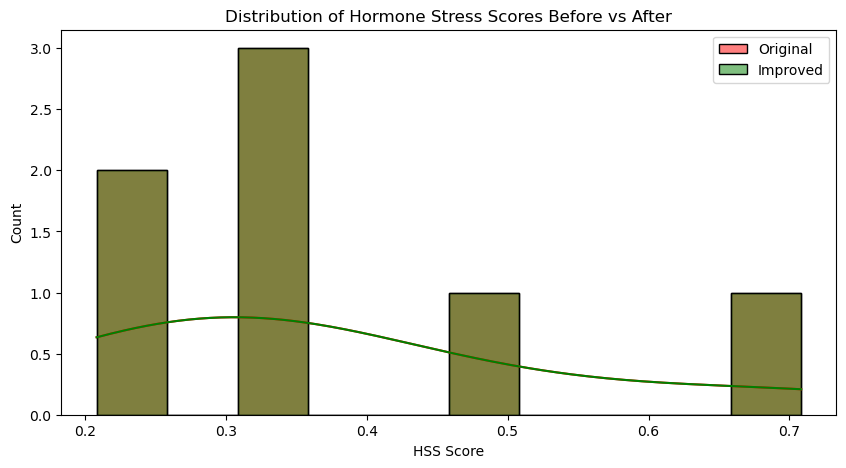

In [39]:
# Histogram of HSS Before and After
# This helps show the distribution shift caused by your simulated intervention:

plt.figure(figsize=(10, 5))
sns.histplot(df_simulated["HSS"], bins=10, color="red", label="Original", kde=True)
sns.histplot(df_simulated["HSS_improved"], bins=10, color="green", label="Improved", kde=True)
plt.title("Distribution of Hormone Stress Scores Before vs After")
plt.xlabel("HSS Score")
plt.legend()
plt.show()

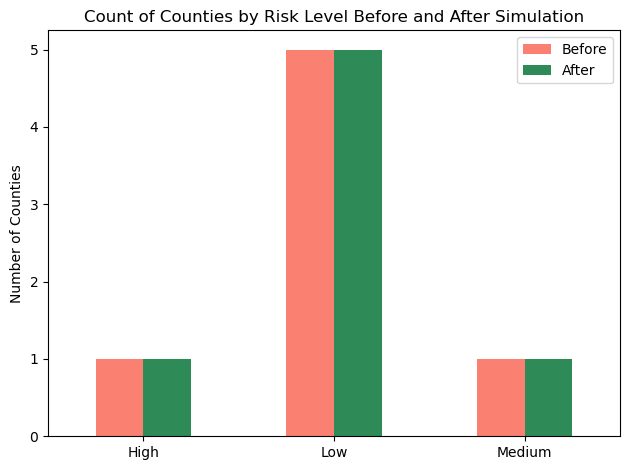

In [41]:
# Bar Chart: Risk Level Counts Before and After

# Count of each risk level
before_counts = df_simulated["Risk_Level"].value_counts().sort_index()
after_counts = df_simulated["New_Risk_Level"].value_counts().sort_index()

# Combine into one DataFrame for plotting
risk_shift_df = pd.DataFrame({
    "Before": before_counts,
    "After": after_counts
})

risk_shift_df.plot(kind="bar", color=["salmon", "seagreen"])
plt.title("Count of Counties by Risk Level Before and After Simulation")
plt.ylabel("Number of Counties")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()